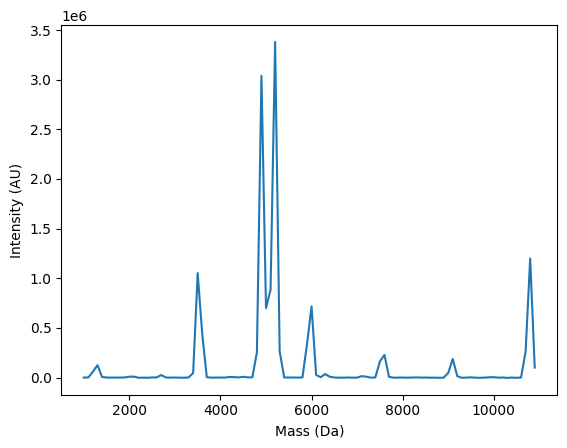

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
mass_range = np.arange(1000, 11000, 100) # Mass range (Da)
intensity_range = np.logspace(2, 7, len(mass_range)) # Intensity range (AU)
noise_level = 1e3 # Noise level (AU)
peak_width = 50 # Peak width (Da)
num_peaks = 20 # Number of peaks

# Generate simulated spectrum
spectrum = np.zeros(len(mass_range))
for i in range(num_peaks):
    mass = np.random.randint(mass_range.min(), mass_range.max())
    intensity = np.random.choice(intensity_range)
    peak = intensity * np.exp(-(mass_range - mass)**2 / (2 * peak_width**2))
    spectrum += peak

# Add noise to spectrum
spectrum += np.random.normal(0, noise_level, len(mass_range))

# Plot spectrum
plt.plot(mass_range, spectrum)
plt.xlabel('Mass (Da)')
plt.ylabel('Intensity (AU)')
plt.show()

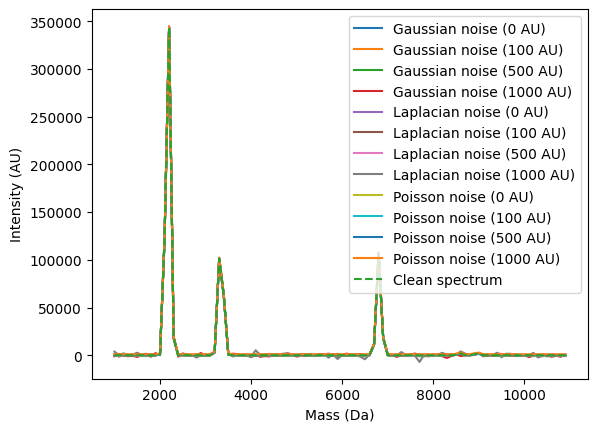

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
mass_range = np.arange(1000, 11000, 100) # Mass range (Da)
intensity_range = np.logspace(2, 7, len(mass_range)) # Intensity range (AU)
peak_width = 50 # Peak width (Da)
num_peaks = 5 # Number of peaks

# Define noise types and levels
noise_levels = [0, 100, 500, 1000] # Noise levels (AU)
noise_types = ['Gaussian', 'Laplacian', 'Poisson'] # Noise types

# Generate simulated spectrum
spectrum = np.zeros(len(mass_range))
for i in range(num_peaks):
    mass = np.random.randint(mass_range.min(), mass_range.max())
    intensity = np.random.choice(intensity_range)
    peak = intensity * np.exp(-(mass_range - mass)**2 / (2 * peak_width**2))
    spectrum += peak

# Loop over noise types and levels
for noise_type in noise_types:
    for noise_level in noise_levels:
        # Add noise to spectrum
        if noise_type == 'Gaussian':
            noise = np.random.normal(0, noise_level, len(mass_range))
        elif noise_type == 'Laplacian':
            noise = np.random.laplace(0, noise_level, len(mass_range))
        elif noise_type == 'Poisson':
            noise = np.random.poisson(noise_level, len(mass_range))
        noisy_spectrum = spectrum + noise

        # Plot spectrum with noise
        plt.plot(mass_range, noisy_spectrum, label=f'{noise_type} noise ({noise_level} AU)')

# Plot clean spectrum
plt.plot(mass_range, spectrum, '--', label='Clean spectrum')

# Add labels and legend
plt.xlabel('Mass (Da)')
plt.ylabel('Intensity (AU)')
plt.legend()
plt.show()

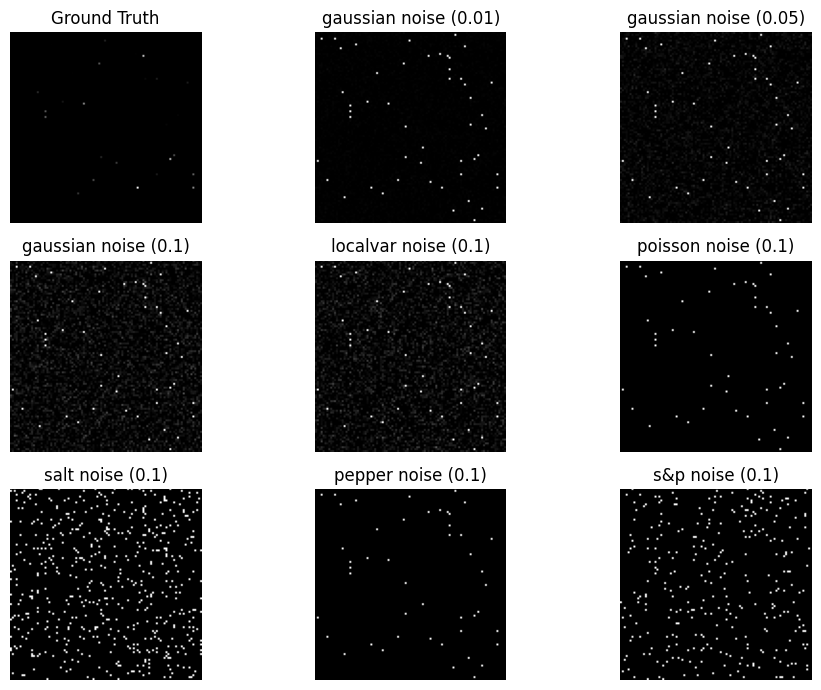

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise
import math

# Define parameters
image_size = (100, 100) # Image size (pixels)
mass_range = np.arange(1000, 11000, 100) # Mass range (Da)
intensity_range = np.logspace(2, 7, len(mass_range)) # Intensity range (AU)
peak_width = 100 # Peak width (Da)
num_peaks = 50 # Number of peaks

# Generate simulated image
image = np.zeros(image_size)
for i in range(num_peaks):
    x = np.random.randint(0, image_size[0])
    y = np.random.randint(0, image_size[1])
    mass = np.random.randint(mass_range.min(), mass_range.max())
    intensity = np.random.choice(intensity_range)
    peak = intensity * np.exp(-((mass_range - mass)**2) / (2 * peak_width**2))
    image[x, y] += peak.sum()

# Add noise to image
noisy_images = []
Noise_Types = ['gaussian', 'localvar', 'poisson', 'salt', 'pepper', 's&p']
for noise_type in Noise_Types:
    if noise_type == 'gaussian':
        for noise_level in [0.01, 0.05, 0.1]:
            noisy_image = random_noise(image, mode=noise_type, var = noise_level**2)
            noisy_images.append([noisy_image, noise_type, noise_level])
    else:
        noisy_image = random_noise(image, mode=noise_type)
        noisy_images.append([noisy_image, noise_type, 0.1])

# Plot images with noise
fig, axs = plt.subplots(3, 3, figsize=(10, 7))
axs = axs.ravel()

axs[0].imshow(image, cmap='gray')
axs[0].set_title(f'Ground Truth')
axs[0].axis('off')

for i, [noisy_image, noise_type, noise_level] in enumerate(noisy_images):
    axs[i+1].imshow(noisy_image, cmap='gray')
    axs[i+1].set_title(f'{noise_type} noise ({noise_level})')
    axs[i+1].axis('off')

plt.tight_layout()
plt.show()

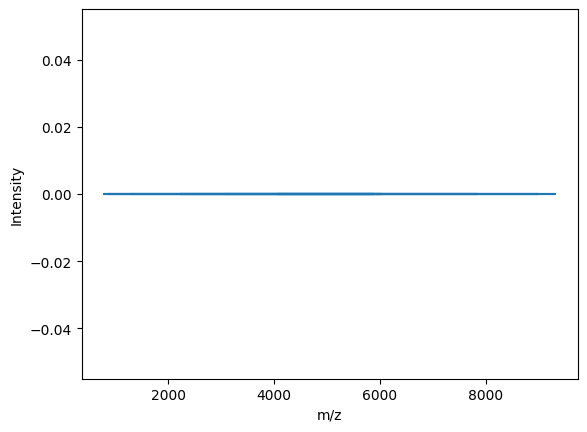

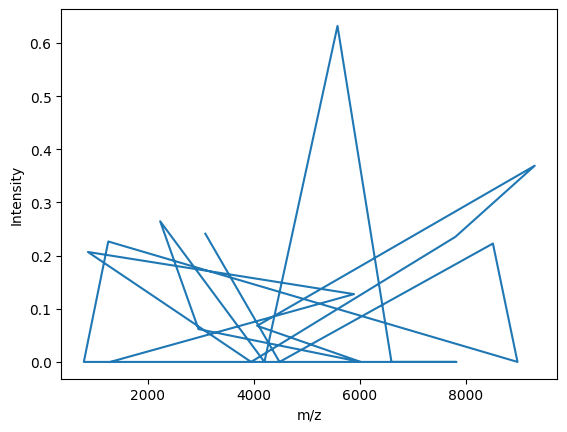

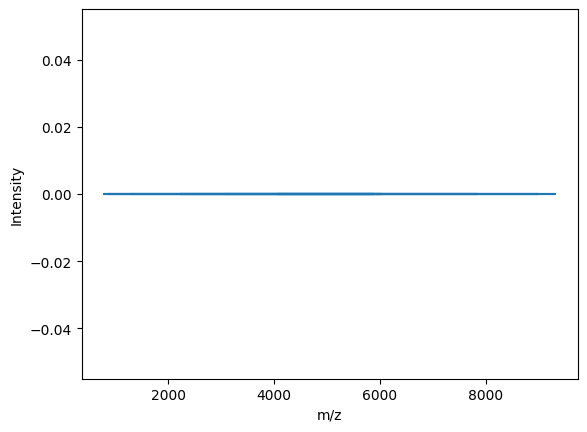

Text(0.5, 1.0, 'Poisson noise')

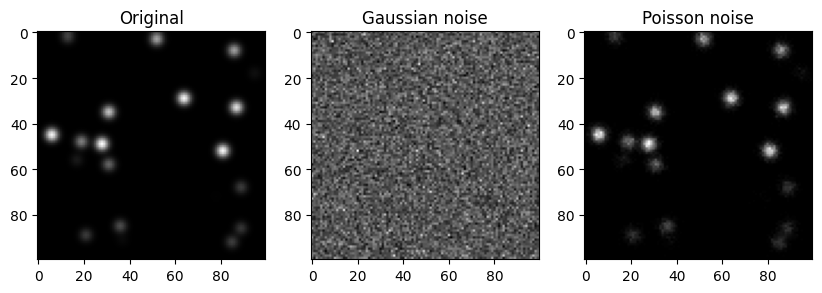

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise
from scipy import ndimage

# Function to generate synthetic MALDI-TOF image
def generate_maldi_image(image_size):
    # Define m/z range and number of peaks
    mz_min = 500
    mz_max = 10000
    num_peaks = 20

    # Generate random m/z values for the peaks
    peak_mz = np.random.uniform(mz_min, mz_max, num_peaks)

    # Generate random peak intensities
    peak_intensities = np.random.uniform(0, 1, num_peaks)

    # Generate synthetic MALDI-TOF image
    image = np.zeros((image_size, image_size, num_peaks))
    for i in range(num_peaks):
        x = np.random.randint(0, image_size)
        y = np.random.randint(0, image_size)
        image[x, y, i] = peak_intensities[i]

    # Convolve with Gaussian filter to simulate spatial blur
    image = ndimage.gaussian_filter(image, sigma=(2, 2, 0))

    return image, peak_mz

# Function to add Gaussian noise to image
def add_gaussian_noise(image, mean, var):
    # Add Gaussian noise to image
    noisy_image = random_noise(image, mode='gaussian', mean=mean, var=var)

    # Scale values to [0, 1]
    noisy_image = (noisy_image - np.min(noisy_image)) / (np.max(noisy_image) - np.min(noisy_image))

    return noisy_image

# Function to add Poisson noise to image
def add_poisson_noise(image):
    # Add Poisson noise to image
    noisy_image = random_noise(image, mode='poisson')

    # Scale values to [0, 1]
    noisy_image = (noisy_image - np.min(noisy_image)) / (np.max(noisy_image) - np.min(noisy_image))

    return noisy_image

# Function to plot spectral data for a given pixel
def plot_spectrum(image, x, y):
    plt.plot(peak_mz, image[x, y, :])
    plt.xlabel('m/z')
    plt.ylabel('Intensity')
    plt.show()

# Generate synthetic MALDI-TOF image
image, peak_mz = generate_maldi_image(100)

# Add Gaussian noise to image
noisy_image_gaussian = add_gaussian_noise(image, 0, 0.1)

# Add Poisson noise to image
noisy_image_poisson = add_poisson_noise(image)

# Plot spectral data for a given pixel
x = 50
y = 50
plot_spectrum(image, x, y)
plot_spectrum(noisy_image_gaussian, x, y)
plot_spectrum(noisy_image_poisson, x, y)

# Display images
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(image.sum(axis=2), cmap='gray')
ax[0].set_title('Original')

ax[1].imshow(noisy_image_gaussian.sum(axis=2), cmap='gray')
ax[1].set_title('Gaussian noise')

ax[2].imshow(noisy_image_poisson.sum(axis=2), cmap='gray')
ax[2].set_title('Poisson noise')


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from skimage import io
from skimage.util import random_noise

def generate_maldi_image(image_shape, mz_values, mz_intensities, num_peaks, peak_width, noise_type='gaussian', noise_params=None):
    """
    Generates a synthetic MALDI-TOF image with random peaks and different types of noise.
    
    Parameters:
        image_shape (tuple): shape of the output image (rows, columns)
        mz_values (array-like): array of mass-to-charge (m/z) values for the peaks
        mz_intensities (array-like): array of peak intensities
        num_peaks (int): number of peaks to generate
        peak_width (float): width of each peak (in m/z units)
        noise_type (str): type of noise to add to the image
        noise_params (dict): dictionary of noise parameters (specific to the selected noise type)
        
    Returns:
        image (ndarray): MALDI-TOF image with random peaks and noise
    """
    # Initialize empty image
    image = np.zeros(image_shape)
    
    # Generate random peak positions and intensities
    peak_positions = np.random.randint(0, image_shape[1], size=num_peaks)
    peak_intensities = np.random.choice(mz_intensities, size=num_peaks)
    
    # Generate Gaussian peaks
    for i, mz in enumerate(mz_values):
        peak = peak_intensities[i] * np.exp(-((mz - peak_positions) / peak_width) ** 2)
        image[:, peak_positions] += peak
    
    # Add noise to the image
    if noise_type == 'gaussian':
        noise = np.random.normal(scale=noise_params['sigma'], size=image_shape)
        image += noise
    elif noise_type == 'poisson':
        image = np.random.poisson(image / noise_params['lambda']) * noise_params['lambda']
    elif noise_type == 'salt-and-pepper':
        image = random_noise(image, mode='s&p', amount=noise_params['amount'], salt_vs_pepper=noise_params['salt_vs_pepper'])
    elif noise_type == 'speckle':
        noise = np.random.normal(scale=noise_params['sigma'], size=image_shape)
        image = image + (image * noise)
    else:
        raise ValueError('Invalid noise type')
    
    # Ensure non-negative pixel values
    image = np.maximum(image, 0)
    
    return image

def plot_pixel_spectra(image, x, y):
    """
    Plots the spectral data for a specific pixel in a MALDI-TOF image.
    
    Parameters:
        image (ndarray): MALDI-TOF image
        x (int): x-coordinate of the pixel
        y (int): y-coordinate of the pixel
    """
    # Extract spectrum for the given pixel
    spectrum = image[y, x]
    
    # Find peak positions and intensities
    peaks, _ = find_peaks(spectrum)
    peak_intensities = spectrum[peaks]
    
    # Plot spectrum and peaks
    fig, ax = plt.subplots()
    ax.plot(spectrum)
    ax.plot(peaks, peak_intensities, 'ro')
    ax.set_xlabel('m/z')
    ax.set_ylabel('Intensity')
    ax.set_title(f'Pixel ({x}, {y})')
    plt.show()

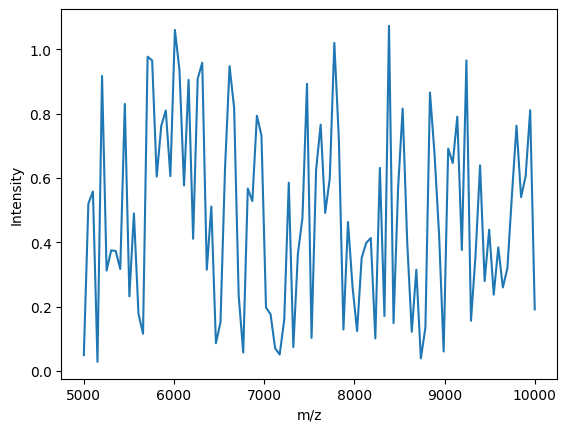

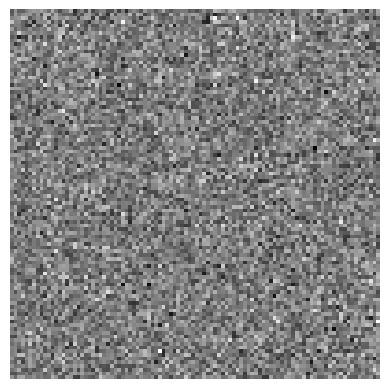

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters for the simulated image
image_width = 100
image_height = 100
mass_range = (5000, 10000)
num_mzs = 100
noise_level = 0.1

# Generate a simulated mass spectrum with random intensities
mz_values = np.linspace(mass_range[0], mass_range[1], num_mzs)
intensity_values = np.random.rand(num_mzs)

# Generate a simulated image with random noise
image = np.zeros((image_height, image_width, num_mzs))
for i in range(image_height):
    for j in range(image_width):
        noise = noise_level * np.random.rand(num_mzs)
        image[i, j, :] = intensity_values + noise

# Plot the first pixel's spectrum for visualization
spectrum = image[0, 0, :]
plt.plot(mz_values, spectrum)
plt.xlabel('m/z')
plt.ylabel('Intensity')
plt.show()

plt.imshow(np.sum(image, axis=-1), cmap='gray')
plt.axis('off')
plt.show()

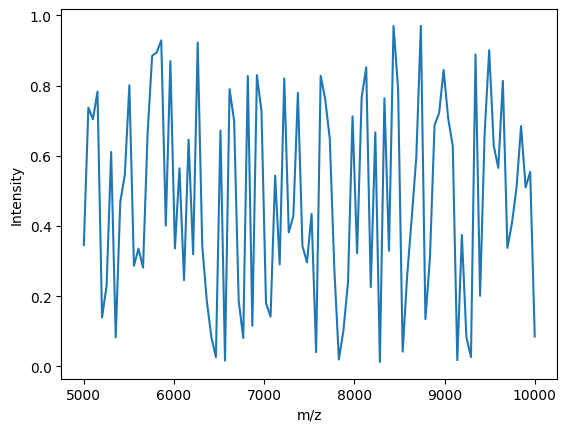

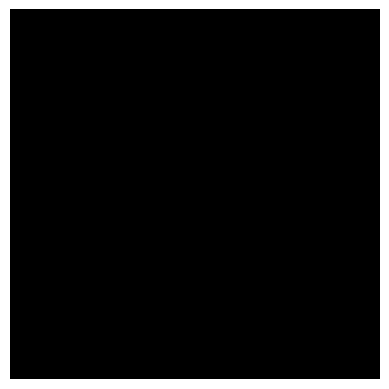

In [12]:
# Define parameters for the simulated image
image_width = 100
image_height = 100
mass_range = (5000, 10000)
num_mzs = 100
noise_level = 0.1

# Generate a simulated mass spectrum with random intensities
mz_values = np.linspace(mass_range[0], mass_range[1], num_mzs)
intensity_values = np.random.rand(num_mzs)

# Generate a simulated image with random noise
image = np.zeros((image_height, image_width, num_mzs))
for i in range(image_height):
    for j in range(image_width):
        noise = 0#noise_level * np.random.rand(num_mzs)
        image[i, j, :] = intensity_values + noise

# Plot the first pixel's spectrum for visualization
spectrum = image[0, 0, :]
plt.plot(mz_values, spectrum)
plt.xlabel('m/z')
plt.ylabel('Intensity')
plt.show()

plt.imshow(np.sum(image, axis=-1), cmap='gray')
plt.axis('off')
plt.show()